##Mining Twitter Feeds using Text Analysis

## Collecting the Data

In [2]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import os

In [2]:
consumer_key = 'wPeEyDrjfMdyQzN763Iyyl02d'
consumer_secret = '481up7mpWX5zy9IusZoe2e4BZ6GywQCA37Q8Q8rn5hMF6WF5mQ'
access_token = '3259586191-vEjD3fCWvWC7p0wg1eWBcrWxGJgsomclwYkeTsY'
access_secret = 'jVU2TyipiAbvpuxF0FGXSYfGDDA09Gq1ghk9onn4aAvIl'

In [3]:
class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status

In [ ]:
if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['python'])

##### Execute all the code above in command prompt and pipeline the output to a textfile using py TwitterMining.py > twitter_data.txt. Hit ctrl+C to stop fetching tweets.

In [15]:
# or you can do this from ipython notebook and it builds on the txt file continously until our limit for the API approaches
# os.system('python TwitterMining.py > twitter_data.txt')

1

In [23]:
tweets = open('twitter_data.txt', 'r')
print tweets.readline() # show first tweet
tweets.close()

{"created_at":"Thu Jul 30 15:47:57 +0000 2015","id":626781283788673024,"id_str":"626781283788673024","text":"@_sinisterBen @The_Extrange @BigDongDaddyDom @Bervose @Uruguayan_Gator oh yeah, it's like the black knight in monty python :-D","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":626780631243091968,"in_reply_to_status_id_str":"626780631243091968","in_reply_to_user_id":2571342366,"in_reply_to_user_id_str":"2571342366","in_reply_to_screen_name":"_sinisterBen","user":{"id":3295575222,"id_str":"3295575222","name":"Beth Metal","screen_name":"BethMetalUK","location":"North East, England","url":null,"description":"Anti censorship, pro #gamergate Babymetal fan. #notyourshield","protected":false,"verified":false,"followers_count":118,"friends_count":350,"listed_count":2,"favourites_count":183,"statuses_count":186,"created_at":"Sun Jul 26 16:41:08 +0000 2015","utc_offset":nu

## Loading Tweets into List of Dicts in JSON Format

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
tweetsData = []
tweetsFile = open('twitter_data.txt', 'r')
for line in tweetsFile:
    try: # File has empty lines between each tweet 
        tweet = json.loads(line) # converts tweet into json format
        tweetsData.append(tweet)
    except:
        continue # if line is empty

In [25]:
# tweetsData is a list of dicts
print len(tweetsData)
print tweetsData[0].keys() # all the features of each tweet

39
[u'contributors', u'truncated', u'text', u'in_reply_to_status_id', u'id', u'favorite_count', u'source', u'retweeted', u'coordinates', u'timestamp_ms', u'entities', u'in_reply_to_screen_name', u'id_str', u'retweet_count', u'in_reply_to_user_id', u'favorited', u'user', u'geo', u'in_reply_to_user_id_str', u'possibly_sensitive', u'lang', u'created_at', u'filter_level', u'in_reply_to_status_id_str', u'place']


## Creating the DataFrame

In [123]:
tweets_df = pd.DataFrame()
tweets_df['text'] = map(lambda tweet: tweet['text'], tweetsData)
tweets_df['lang'] = map(lambda tweet: tweet['lang'], tweetsData)
tweets_df['location'] = map(lambda tweet: tweet['user']['location'] if tweet['user'] != None else None, tweetsData)
tweets_df['time'] = map(lambda tweet: tweet['created_at'], tweetsData)

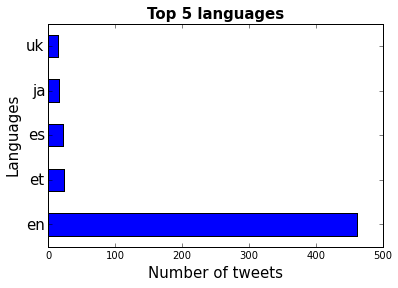

In [33]:
tweetsLang = tweets_df.lang.value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel('Languages', fontsize=15)
ax.set_xlabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweetsLang[:5].plot(ax=ax, kind='barh')

## Text Analysis I

In [35]:
import re

In [124]:
def wordInText(word, text):
    word = word.lower()
    text = text.lower()
    if re.search(word, text):
        return True
    else: return False

In [45]:
tweets_df["python"] = tweets_df.text.apply(lambda tweet: wordInText("python", tweet))

In [138]:
# Of the tweets that mention python, lets see how many refer to data science or machine learning
tweets_df["dataScience"] = tweets_df.text.apply(lambda tweet: wordInText("data science", tweet))
tweets_df["machineLearning"] = tweets_df.text.apply(lambda tweet: wordInText("machine learning", tweet))
tweets_df["both"] = tweets_df.text.apply(lambda tweet: 
                                         wordInText("data science", tweet) and wordInText("machine learning", tweet))

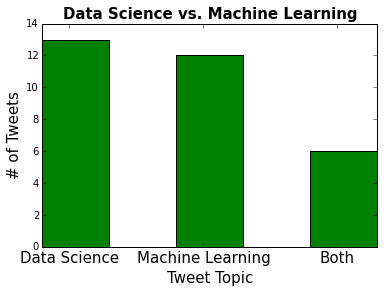

In [150]:
tweetTopicCount = [tweets_df['dataScience'].value_counts()[True], 
                   tweets_df['machineLearning'].value_counts()[True],
                   tweets_df['both'].value_counts()[True]]
                          
topics = ["Data Science", "Machine Learning", "Both"]
X = list(range(len(tweetTopicCount)))


fig, ax = plt.subplots()
width = 0.5
plt.bar(X, tweetTopicCount, width, alpha=1,color='g')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('# of Tweets', fontsize=15)
ax.set_xlabel('Tweet Topic' , fontsize=15)
ax.set_xticklabels(topics)
ax.set_xticks([p + 0.4 * width for p in X])
ax.set_title('Data Science vs. Machine Learning', fontsize=15, fontweight='bold')

## Text Analysis II

In [192]:
# Now we will extract popular hashtags from our tweets
tweets_df['hashtags'] = map(lambda tweet: tweet['entities']['hashtags'][0]['text'] if not(not tweet['entities']['hashtags'])
                            else "none", tweetsData) # if statement checks if list is empty (no #) or not
tweetsX = tweets_df.hashtags

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [252]:
vectorizer = TfidfVectorizer(stop_words='english',
                             min_df = 2,
                             max_df = 0.95,
                             sublinear_tf=True,
                             use_idf=True)
# min_df = 2, remove words appearing in less than 2 documents
# max_df = 0.95, remove words appering in more than 95% of the documents

transformedTweets = vectorizer.fit_transform(tweetsX)

In [166]:
import operator

In [212]:
print vectorizer.vocabulary_

{u'shoes': 25, u'hiring': 12, u'java': 16, u'arduino': 1, u'socialmedia': 26, u'python': 21, u'newcastle': 19, u'rstats': 24, u'randombits': 22, u'deeplearning': 9, u'kindle': 18, u'dataanalysis': 7, u'computer': 4, u'bigdata': 2, u'chavezvictoriadevzla': 3, u'appleiphone': 0, u'fate_sn_anime': 11, u'itjob': 15, u'ios': 14, u'ibis': 13, u'job': 17, u'conda': 5, u'\u30d5\u30a9\u30ed\u30ef\u30fc\u306e8\u5272\u304f\u3089\u3044\u304c\u4f53\u9a13\u3057\u305f\u4e8b\u304c\u7121\u3055\u305d\u3046\u306a\u4f53\u9a13': 27, u'raspberry': 23, u'data': 6, u'faster': 10, u'programming': 20, u'datascience': 8}


In [246]:
sortedWords = sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1), reverse=True)
topHashtags = [word[0] for word in sortedWords]

In [251]:
topActualWords = [word for word in topHashtags if len(word) < 15] # there are some large trash hashtags
print topActualWords

[u'socialmedia', u'shoes', u'rstats', u'raspberry', u'randombits', u'python', u'programming', u'newcastle', u'kindle', u'job', u'java', u'itjob', u'ios', u'ibis', u'hiring', u'fate_sn_anime', u'faster', u'deeplearning', u'datascience', u'dataanalysis', u'data', u'conda', u'computer', u'bigdata', u'arduino', u'appleiphone']
